In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
from statistics import stdev
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_json('modcloth_final_data.json',encoding_errors='ignore',lines = True)
df.head(10)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN


1. Read the datasets, Check the data types and Change the data types appropriately.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [4]:
df['item_id'] = df['item_id'].astype('object')
df['user_id'] = df['user_id'].astype('object')
df['bust'] = pd.to_numeric(df['bust'],errors = 'coerce')

2. Change the height column datatype to float after converting the values as shown Below. 5.7

In [5]:
df['height'] = df['height'].str.replace('ft ','.')
df['height'] = df['height'].str.replace('in',' ')
df['height'] = pd.to_numeric(df['height'],errors = 'coerce')

In [6]:
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36.0,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5.7,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [7]:
df.dtypes

item_id            object
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust              float64
height            float64
user_name          object
length             object
fit                object
user_id            object
shoe size         float64
shoe width         object
review_summary     object
review_text        object
dtype: object

3. Rename the names of the columns which have space in between the column.
Ex: shoe size as shoe_size etc.

In [8]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(' ', '_')

In [10]:
df.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36.0,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5.7,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


4. Check the missing values and Identify the distribution of the variables to impute the
missing values. Explain based on your analysis decide the features which can be dropped and Which can be imputed. And also explain the reason to choose the metric that you have chosen to impute the null values.

Note: Kindly copy the datasets and work on the new data frame.
4.1 Check the count and percentage of missing values.

In [11]:
df1 = df.copy()

In [12]:
df1.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36.0,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5.7,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [13]:
Total = df1.isnull().sum().sort_values(ascending=False) 
Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
waist,79908,96.518903
bust,70937,85.683054
shoe_width,64183,77.525063
shoe_size,54875,66.282160
hips,26726,32.281677
review_text,6725,8.122962
review_summary,6725,8.122962
cup_size,6255,7.555260
bra_size,6018,7.268994
height,4005,4.837541


4.2 check the Mean and Median.

In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
waist,2882.0,31.319223,5.302849,20.00,28.0,30.0,34.0,50.0
size,82790.0,12.661602,8.271952,0.00,8.0,12.0,15.0,38.0
quality,82722.0,3.949058,0.992783,1.00,3.0,4.0,5.0,5.0
hips,56064.0,40.358501,5.827166,30.00,36.0,39.0,43.0,60.0
bra_size,76772.0,35.972125,3.224907,28.00,34.0,36.0,38.0,48.0
bust,11853.0,37.499199,4.635310,20.00,34.0,36.0,40.0,59.0
height,78785.0,5.465562,0.281833,3.11,5.3,5.5,5.7,7.7
shoe_size,27915.0,8.145818,1.336109,5.00,7.0,8.0,9.0,38.0


In [15]:
np.mean(df1)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


item_id      469325.229170
waist            31.319223
size             12.661602
quality           3.949058
hips             40.358501
bra_size         35.972125
bust             37.499199
height            5.465562
user_id      498849.564718
shoe_size         8.145818
dtype: float64

In [16]:
df1.median()

/var/folders/tk/sl08nd_141lbs3dnb5c22yvc0000gn/T/ipykernel_30252/2279417019.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.median()


item_id      454030.0
waist            30.0
size             12.0
quality           4.0
hips             39.0
bra_size         36.0
bust             36.0
height            5.5
user_id      497913.5
shoe_size         8.0
dtype: float64

4.3 Check the distribution of the variables using Histogram or Dist plot or KDE and boxplot etc.
Kindly explore at least two.

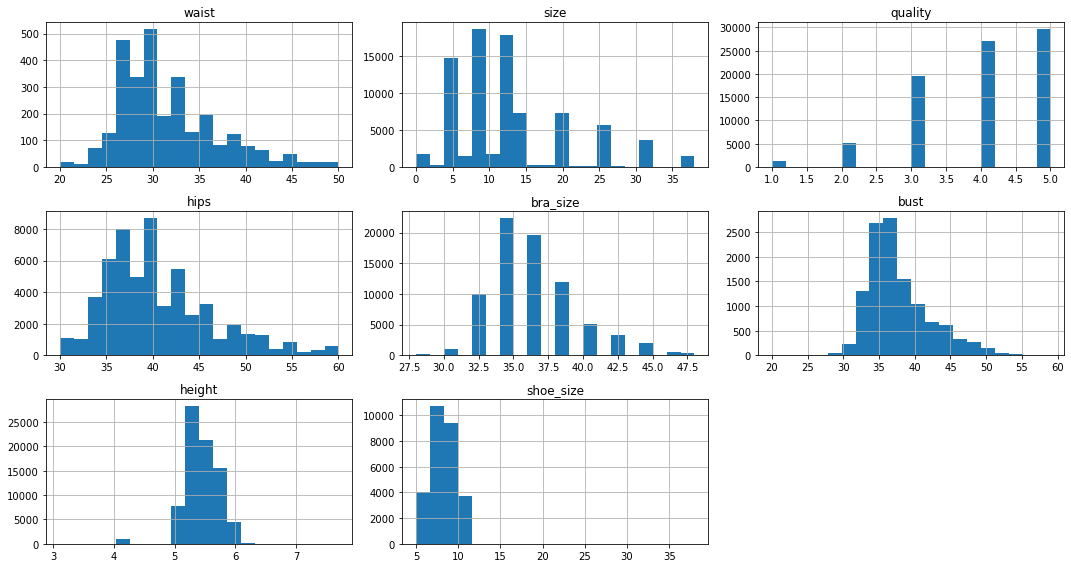

In [17]:
df1.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

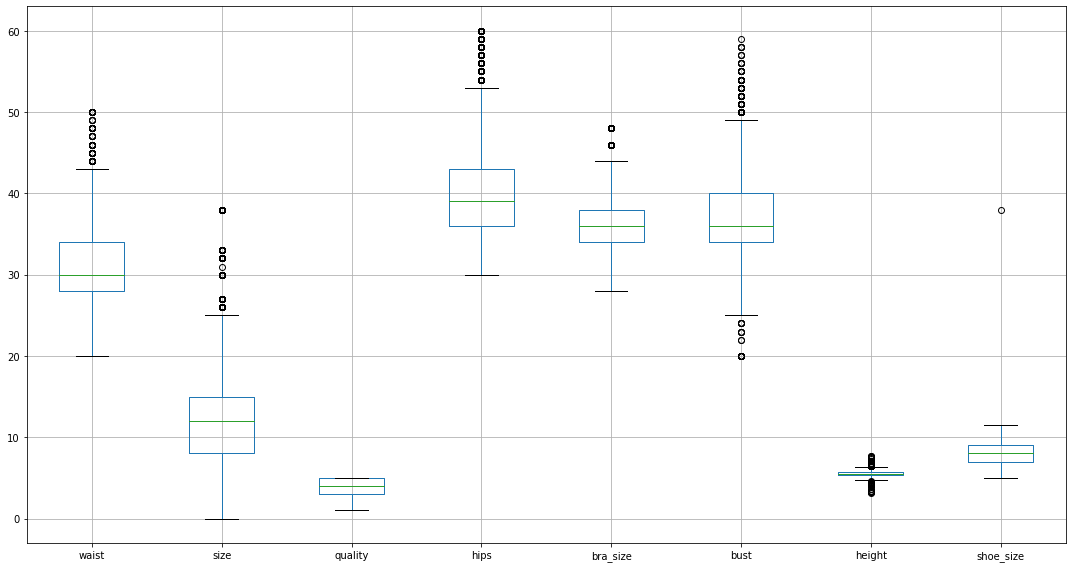

In [18]:
df1.boxplot(figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

4.4 Check the Skewness and Kurtosis.


Explain what the Skewness and Kurtosis describe.

In [19]:
### Skewness: Skewness ia a measure of asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images.
           ## A distribution can have right or left or zero skewness.
### Kurtosis: Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. 
            ## Excess kurtosis is the tailedness of a distribution relative to a normal distribution.
            ## Distribution with medium kurtosis are mesokurtic
            ## Distribution with low kurtosis are platykurtic

In [19]:
df1.skew()

/var/folders/tk/sl08nd_141lbs3dnb5c22yvc0000gn/T/ipykernel_30252/149261804.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


item_id     -0.120644
waist        0.993061
size         1.128301
quality     -0.676777
hips         0.969187
bra_size     0.901004
bust         0.951904
height      -1.176524
user_id      0.008201
shoe_size    0.436713
dtype: float64

In [20]:
df1.kurtosis()

/var/folders/tk/sl08nd_141lbs3dnb5c22yvc0000gn/T/ipykernel_30252/3614614862.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.kurtosis()


item_id     -1.215909
waist        0.836624
size         0.760010
quality     -0.167085
hips         0.848464
bra_size     1.039445
bust         1.207346
height       5.745281
user_id     -1.182436
shoe_size    8.448820
dtype: float64

4.5 Based on the above approach impute the missing values with the right
metric. Or If you want to get some analysis before imputing missing values
feel free to explore the analysis.

In [21]:
df1['waist'] = df1['waist'].fillna(df1['waist'].median())
df1['size'] = df1['size'].fillna(df1['size'].median())
df1['hips'] = df1['hips'].fillna(df1['hips'].median())
df1['quality'] = df1['quality'].fillna(df1['quality'].mode())
df1['bra_size'] = df1['bra_size'].fillna(df1['bra_size'].median())
df1['height'] = df1['height'].fillna(df1['height'].median())
df1['shoe_size'] = df1['shoe_size'].fillna(df1['shoe_size'].median())
df1['bust'] = df1['bust'].fillna(df1['bust'].median())

freq = df1['shoe_width'].value_counts()
df1['shoe_width'].replace({np.nan:freq.index[0]},inplace=True)
freq = df1['length'].value_counts()
df1['length'].replace({np.nan:freq.index[0]},inplace=True)
freq = df1['review_summary'].value_counts()
df1['review_summary'].replace({np.nan:freq.index[0]},inplace=True)
freq = df1['review_text'].value_counts()
df1['review_text'].replace({np.nan:freq.index[0]},inplace=True)
freq = df1['cup_size'].value_counts()
df1['cup_size'].replace({np.nan:freq.index[0]},inplace=True)
freq = df1['cup_size'].value_counts()
df1['cup_size'].replace({np.nan:freq.index[0]},inplace=True)
freq = df1['quality'].value_counts()
df1['quality'].replace({np.nan:freq.index[0]},inplace=True)

In [22]:
df['quality'].value_counts()

5.0    29604
4.0    27118
3.0    19526
2.0     5130
1.0     1344
Name: quality, dtype: int64

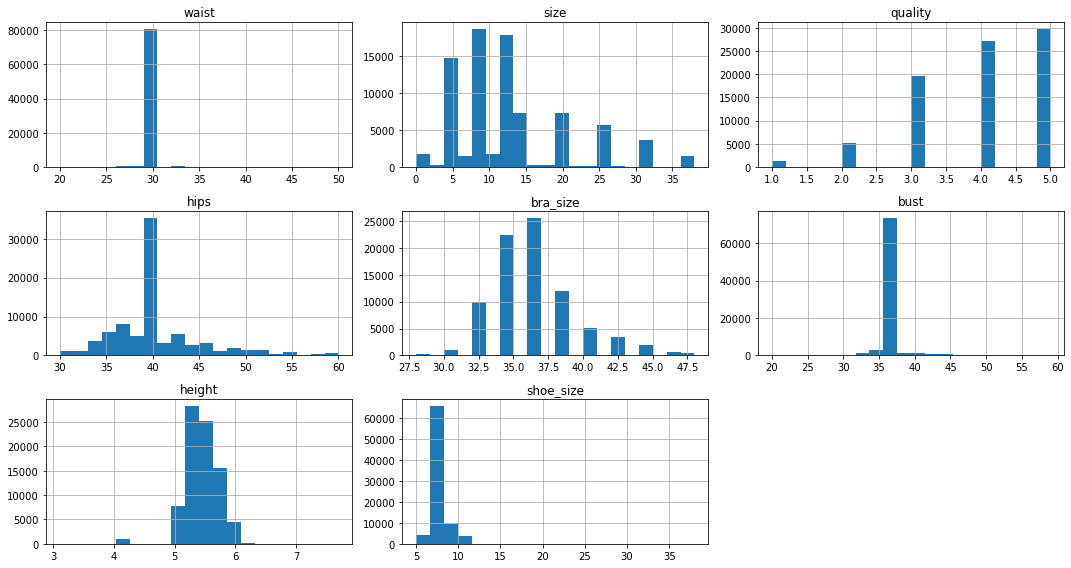

In [23]:
df1.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [24]:
Total = df1.isnull().sum().sort_values(ascending=False) 
Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
item_id,0,0.0
waist,0,0.0
review_summary,0,0.0
shoe_width,0,0.0
shoe_size,0,0.0
user_id,0,0.0
fit,0,0.0
length,0,0.0
user_name,0,0.0
height,0,0.0


5. Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3.

In [25]:

# calculate the first quartile
Q1 = df1.quantile(0.25)

#calculate the third quartile
Q3 = df1.quantile(0.75)

# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the variable
df1 = df1[~((df1 < (Q1 - 2.5 * IQR)) | (df1 > (Q3 + 2.5 * IQR)))]



/var/folders/tk/sl08nd_141lbs3dnb5c22yvc0000gn/T/ipykernel_30252/962604707.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1 < (Q1 - 2.5 * IQR)) | (df1 > (Q3 + 2.5 * IQR)))]


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  object 
 1   waist           80145 non-null  float64
 2   size            81283 non-null  float64
 3   quality         82790 non-null  float64
 4   cup_size        82790 non-null  object 
 5   hips            76261 non-null  float64
 6   bra_size        82790 non-null  float64
 7   category        82790 non-null  object 
 8   bust            72992 non-null  float64
 9   height          81741 non-null  float64
 10  user_name       82790 non-null  object 
 11  length          82790 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  object 
 14  shoe_size       58707 non-null  float64
 15  shoe_width      82790 non-null  object 
 16  review_summary  82790 non-null  object 
 17  review_text     82790 non-null 

6.Check for the category dress review and visualize the top 10 reviews using any
relevant plot. Identify the negative reviews if there are any.

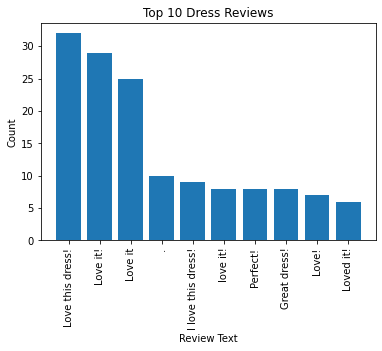

In [27]:

# filter the dataframe to only include reviews in the dress category
dress_category= df1[df1['category'] == 'dresses']

# group the filtered dataframe by review text and count the number of occurrences
review_counts = dress_category.groupby('review_text').size().reset_index(name='Count')

# sort the grouped dataframe in descending order of occurrence count
review_counts = review_counts.sort_values('Count', ascending=False)

# select the top 10 reviews
top_reviews = review_counts.head(10)

# plot the top 10 reviews using a bar chart
plt.bar(top_reviews['review_text'], top_reviews['Count'])
plt.xticks(rotation=90)
plt.xlabel('Review Text')
plt.ylabel('Count')
plt.title('Top 10 Dress Reviews')
plt.show()

7. Find out the average shoe size for the different fits of the customer. Visualize using any relevant plot. Explain that, Is there any significant different shoe sizes for different fits?

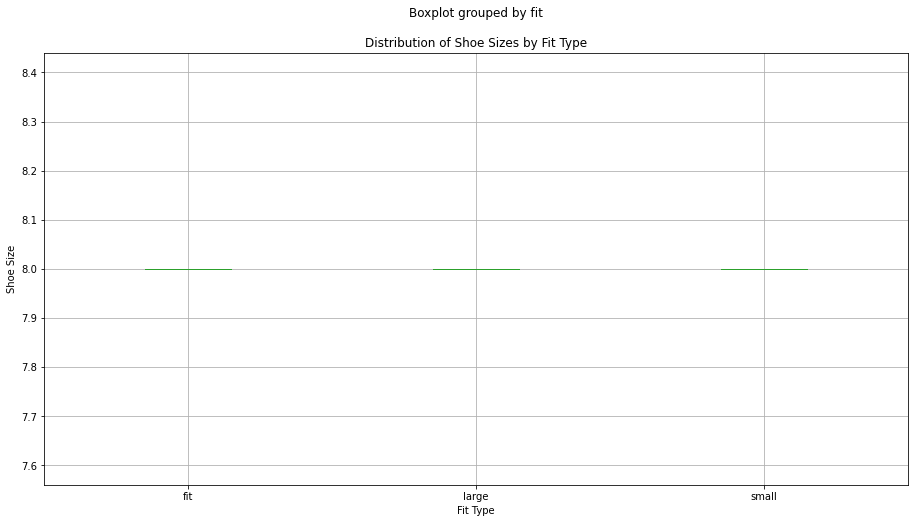

In [45]:

df1.boxplot(column='shoe_size', by='fit')
plt.xlabel('Fit Type')
plt.ylabel('Shoe Size')
plt.title('Distribution of Shoe Sizes by Fit Type')
plt.show()

In [44]:
plt.rcParams['figure.figsize'] = [15,8]

This boxplot would allow you to compare the distribution of shoe sizes across different fit types and see if there are any significant differences. From the above boxplot there is not significant difference


8. Identify the customer’s common shoe width and average size for those who 
purchased the maximum quality. Is the mode of shoe width affect the user review?
Visualize using the appropriate plot.

Mode of Shoe Width for Maximum Quality:  average
Mean of Shoe Size for Maximum Quality:  8.0


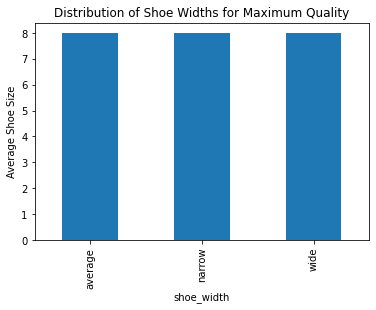

In [30]:
max_quality = df1[df1["quality"] == df1["quality"].max()]

# calculate the mode and mean of shoe width and shoe size columns
mode_shoe_width = max_quality["shoe_width"].mode()[0]
mean_shoe_size = max_quality["shoe_size"].mean()

print("Mode of Shoe Width for Maximum Quality: ", mode_shoe_width)
print("Mean of Shoe Size for Maximum Quality: ", mean_shoe_size)

# plot the distribution of shoe widths and the corresponding average shoe sizes
fig, ax = plt.subplots()
ax.set_title("Distribution of Shoe Widths for Maximum Quality")
ax.set_xlabel("Shoe Width")
ax.set_ylabel("Average Shoe Size")
max_quality.groupby(["shoe_width"])["shoe_size"].mean().plot(kind="bar", ax=ax)
plt.show()

In [31]:
df2 = df1[df1["shoe_width"] == "average"]
contingency_table = pd.crosstab(df2['shoe_width'], df2['review_summary'])

# perform chi-squared test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# check p-value against alpha level (e.g. alpha = 0.01 or 0.05)
alpha = 0.01
if p_value < alpha:
    print("There is evidence of association between shoe width mode and user review")
else:
    print("There is no evidence of association between shoe width mode and user review")

There is no evidence of association between shoe width mode and user review


9. Extract the records belonging to the top 10 reviews, and then find the review 
summary for the different cup sizes. The basic analysis explains what you would try to 
infer. Try to use visualization.

In [32]:
review_counts = df1.groupby('review_summary').size().reset_index(name='Count')

review_counts = review_counts.sort_values('Count', ascending=False)

top_reviews = review_counts.head(10)
top_reviews

,review_summary,Count
30234,Love it!,6910
11679,I absolutely love this dr,124
22240,I really wanted to love t,92
30170,Love it,92
18576,I love this dress so much,84
51172,This is one of my favorit,83
45,.,76
14270,I get so many compliments,71
38712,Perfect!,69
16784,I love everything about t,63


In [33]:
top_10_summaries = df1['review_summary'].value_counts().nlargest(10).index.tolist()
top_10_reviews = df1[df1['review_summary'].isin(top_10_summaries)]

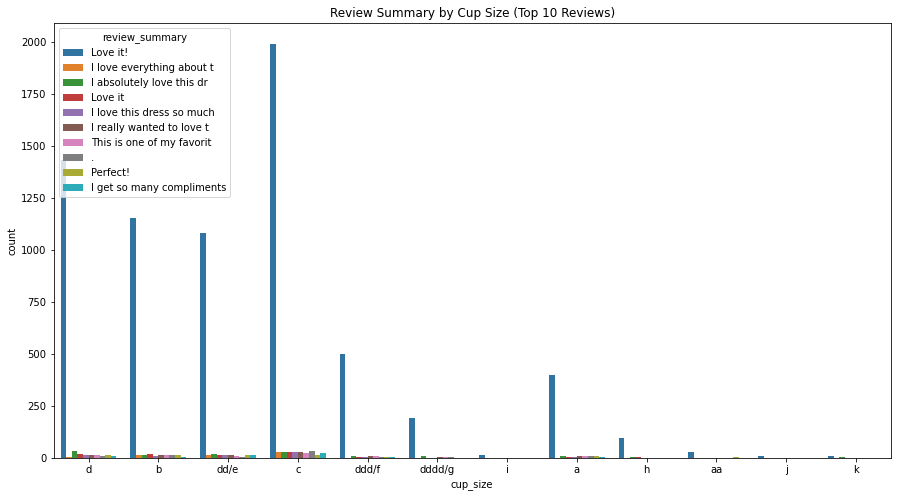

In [46]:
sns.countplot(x='cup_size', hue='review_summary', data=top_10_reviews)
plt.title('Review Summary by Cup Size (Top 10 Reviews)')
plt.show()

10. Identify the most common review that we got from the customer whose hips size 
is greater than 35. Find out what kind of inference you can make.

In [35]:

filtered_df = df1[df1['hips'] > 35]

mode_review = filtered_df['review_text'].mode()[0]

print('Most common review from customers with hip size > 35:')
print(mode_review)

Most common review from customers with hip size > 35:
Love it!


11. What is the relationship between height and weight? Describe what kind of 
relationship it has.

In [ ]:
## There was no column named weight in the given dataset

12. Plot the pair plot for the numerical plot. Explain according to your problem 
statement how the pair plot would help you.

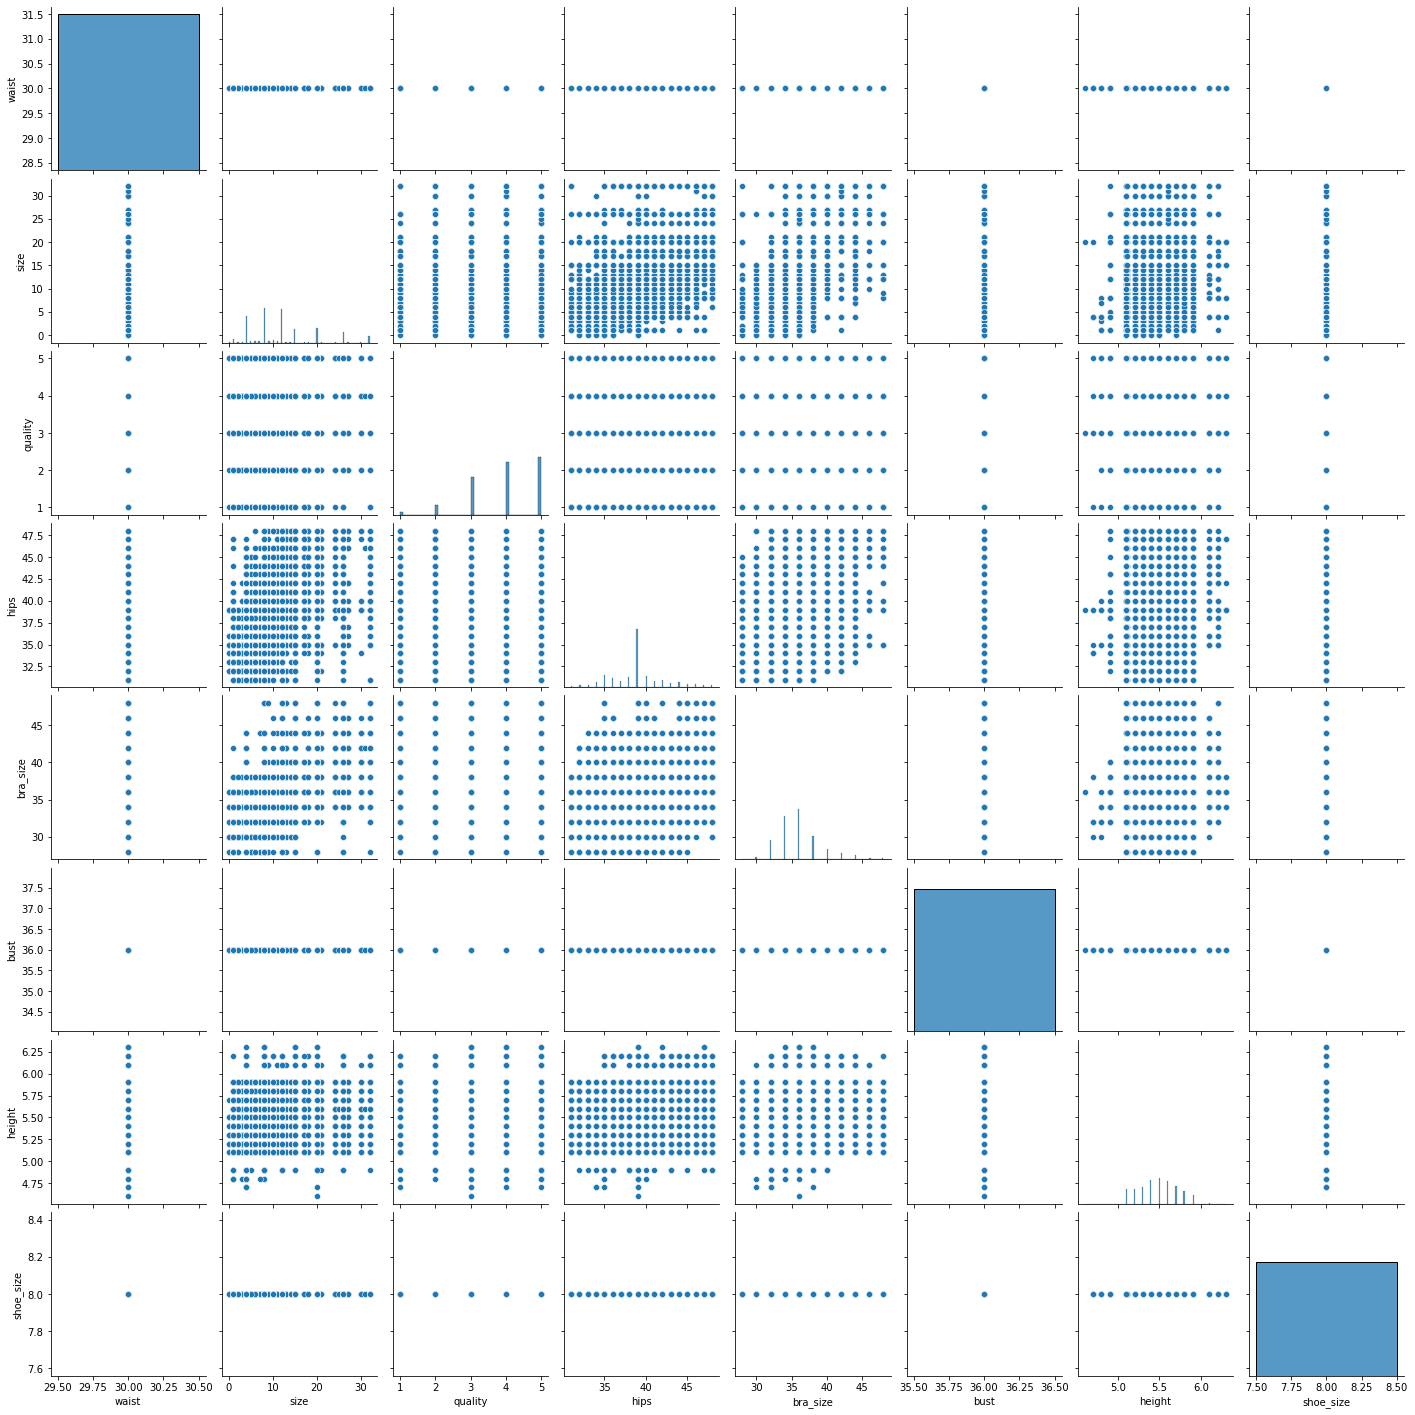

In [36]:
num_vars = df1.select_dtypes(include=np.number)

sns.pairplot(num_vars)

# Statistical Analysis:

1. Test the claim that the category feature and review summary have any 
relationship among them. The level of significance is 5%

In [37]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

contingency_table = pd.crosstab(df1['category'], df1['review_summary'])
expected_freq = chi2_contingency(contingency_table)[3]

chi_squared = ((contingency_table - expected_freq)**2 / expected_freq).sum().sum()

df = (len(contingency_table.index) - 1) * (len(contingency_table.columns) - 1)
p_value = 1 - chi2.cdf(chi_squared, df)
if p_value < 0.05:
    print("There is a significant relationship between category and review summary.")
else:
    print("There is no significant relationship between category and review summary.")

There is a significant relationship between category and review summary.


2. Test statistically whether the size and hips have any relationship using 0.05 
alpha. Before the above test, Test the normality test

In [38]:
contingency_table = pd.crosstab(df1['size'], df1['hips'])
expected_freq = chi2_contingency(contingency_table)[3]

chi_squared = ((contingency_table - expected_freq)**2 / expected_freq).sum().sum()

df = (len(contingency_table.index) - 1) * (len(contingency_table.columns) - 1)
p_value = 1 - chi2.cdf(chi_squared, df)
if p_value < 0.05:
    print("There is a significant relationship between category and review summary.")
else:
    print("There is no significant relationship between category and review summary.")

There is a significant relationship between category and review summary.


3. Does the quality significantly differ for any one shoe width? Test the test with 
96%confidence intervals.

In [47]:
f_statistic,p_value = stats.f_oneway(df1[df1['shoe_width']=='average']['quality'], 
                         df1[df1['shoe_width']=='wide']['quality'], 
                         df1[df1['shoe_width']=='narrow']['quality'])
print('p-value: ', p_value)

p-value:  0.09155344683413974


Since p-value is less than 0.04, we can reject the null hypothesis and conclude that there is a significant difference in the quality between different shoe widths.

4. Check if the shoe width feature affects the review summary with a 99% 
confidence interval.

In [40]:

contingency_table = pd.crosstab(df1['shoe_width'], df1['review_summary'])

chi2, pval, dof, expected = stats.chi2_contingency(contingency_table)


print(f'Chi-squared statistic: {chi2:.3f}, p-value: {pval:f}')

Chi-squared statistic: 129510.890, p-value: 0.000000


since the p-value is less than 0.01, we can reject the null hypothesis and conclude that there is a significant association between the shoe width and review summary categories. 

5. Check if the length feature affects the review summary with a 95% confidence
interval.

In [41]:
contingency_table = pd.crosstab(df1['length'], df1['review_summary'])

chi2, pval, dof, expected = stats.chi2_contingency(contingency_table)


print(f'Chi-squared statistic: {chi2:.3f}, p-value: {pval:f}')

Chi-squared statistic: 265422.836, p-value: 0.000000


6. Does the average quality significantly differ for the different fits? Kindly test the 
relevant hypothesis test by having 0.05 alpha.
Check the normality of the data before the above test. Alpha = .05

In [42]:
grouped_data = df1.groupby('fit')['quality']

for fit, data in grouped_data:
    stat, p = shapiro(data)
    print(f'Fit: {fit}, Statistic: {stat:.3f}, p-value: {p:.3f}')

Fit: fit, Statistic: 0.825, p-value: 0.000
Fit: large, Statistic: 0.869, p-value: 0.000
Fit: small, Statistic: 0.902, p-value: 0.000


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [43]:
result = f_oneway(df1[df1['fit'] == 'fit']['quality'], 
                  df1[df1['fit'] == 'small']['quality'], 
                  df1[df1['fit'] == 'large']['quality'])

print(f'F-statistic: {result.statistic:.3f}, p-value: {result.pvalue:.3f}')

F-statistic: 2137.263, p-value: 0.000
